In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [6]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train=y_train.reshape(-1)
y_train.shape

(50000,)

In [10]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [11]:
etiketler=["uçak","otomobil","kuş","kedi","geyik","köpek","kurbağa","at","gemi","kanyon"]

In [12]:
len(etiketler)

10

In [13]:
def gorsellestir(x,y,index):
    plt.figure(figsize=(32,2))
    plt.imshow(x[index])
    plt.xlabel(etiketler[y[index]])

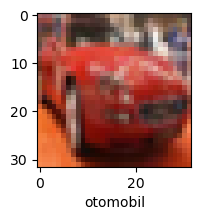

In [14]:
gorsellestir(x_train,y_train,5)

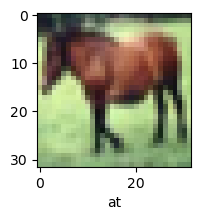

In [15]:
gorsellestir(x_train,y_train,7)

In [16]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [17]:
x_train=x_train/255
x_test=x_test/255

## CNN

In [42]:
model=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPool2D(pool_size=(2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(units=64,activation="relu"),
    layers.Dense(units=10,activation="softmax")
])

C:\Users\mehme\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253,760 (991.25 KB)

 Trainable params: 84,586 (330.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 169,174 (660.84 KB)

In [44]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [46]:
model.fit(x_train,y_train,epochs=25)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3735 - loss: 1.7257
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5656 - loss: 1.2254
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6178 - loss: 1.0843
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6546 - loss: 0.9831
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6774 - loss: 0.9258
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7031 - loss: 0.8550
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7172 - loss: 0.8129
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7335 - loss: 0.7722
Epoch 9/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7463 - loss: 0.7280
Epoch 10/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7517 - loss: 0.7070
Epoch 11/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7649 - loss: 0.6737
Epoch 12/25
1563/1563 ━━━━━━━━

In [56]:
loss, accuracy = model.evaluate(x_test,y_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6805 - loss: 1.1904
1.211087703704834
0.6769000291824341


In [47]:
y_pred=model.predict(x_test)
y_pred[0:2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[3.89996899e-07, 2.64438560e-09, 1.99898393e-04, 8.53789330e-01,
        8.89589835e-04, 1.44180462e-01, 6.69072415e-06, 2.13237527e-05,
        9.12229181e-04, 1.19277601e-08],
       [1.06407955e-04, 4.01658565e-03, 1.07491693e-09, 3.11255310e-09,
        2.36888453e-10, 1.73156246e-11, 3.76858890e-13, 9.64127875e-11,
        9.95876670e-01, 2.94341504e-07]], dtype=float32)

In [58]:
y_pred=[np.argmax(deger) for deger in y_pred]
y_pred[0:2]

[3, 8]

In [66]:
y_test=y_test.reshape(-1)
y_test[0:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [68]:
y_pred[0:10]

[3, 8, 8, 8, 4, 6, 1, 6, 3, 1]

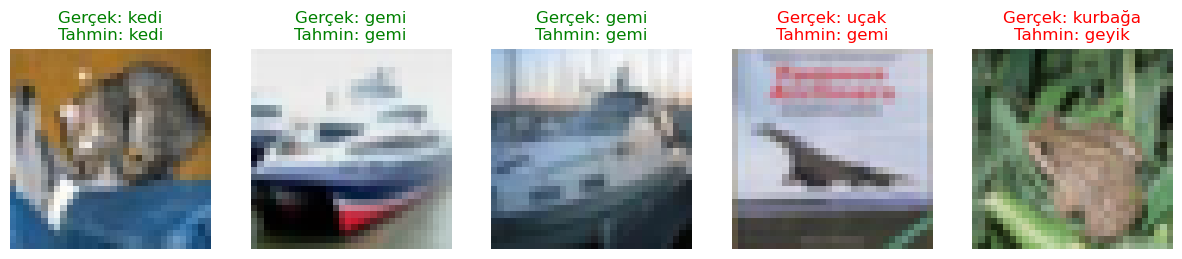

In [88]:
def gorsellestir_tahminler(x_test, y_test, y_pred, num_samples=5):
    plt.figure(figsize=(15, 10))
    etiketler=["uçak","otomobil","kuş","kedi","geyik","köpek","kurbağa","at","gemi","kamyon"]
    for i in range(num_samples):
        
        true_class = y_test[i]  # Gerçek sınıf
        predicted_class = np.argmax(y_pred[i])  # Tahmin edilen sınıf

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x_test[i])
        plt.axis('off')

        color = "green" if true_class == predicted_class else "red"
        plt.title(f"Gerçek: {etiketler[true_class]}\nTahmin: {etiketler[predicted_class]}", color=color)
    
    plt.show()


gorsellestir_tahminler(x_test, y_test, y_pred, num_samples=5)